# Mapas Choropleth 

## Uso do Plotly Offline

Importe configure tudo para trabalhar offline.

In [2]:
import plotly as py
import plotly.graph_objs as go 
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

Agora configure tudo para que os as figuras apareçam no notebook:

In [3]:
init_notebook_mode(connected=True) 

Mais informações sobre como usar o Plotly Offline podem ser encontradas [aqui](https://plot.ly/python/offline/).

## Choropleth US Maps

O mapeamento da Plotly pode ser um pouco difícil de se acostumar no início, lembre-se de consultar o arquiv pdf na pasta de visualização de dados, ou [encontrá-la aqui em linha](https://images.ploots.ly/plotly-documentation/images/ python_cheat_sheet.pdf).

In [4]:
import pandas as pd

Agora precisamos começar a construir o nosso dicionário de dados. A maneira mais fácil de fazer isso é usar a função ** dict () ** da forma geral:

* type = 'choropleth',
* locations = Lista de estados
* locationmode = 'estados-USA'
* colorscale= 

Ou uma seqüência predefinida:

    'pairs' | 'Greys' | 'Greens' | 'Bluered' | 'Hot' | 'Picnic' | 'Portland' | 'Jet' | 'RdBu' | 'Blackbody' | 'Earth' | 'Electric' | 'YIOrRd' | 'YIGnBu'

ou crie uma [escala de cores personalizada](https://plot.ly/python/heatmap-and-contour-colorscales/)

* text= lista ou matriz de texto para exibição por ponto
* z= matriz de valores no eixo z (cor do estado)
* colorbar = {'title':'Título da barra de cores'})

Aqui está um exemplo simples:

In [12]:
data = dict(type = 'choropleth',
            locations = ['AZ','CA','NY'],
            locationmode = 'USA-states',
            colorscale= 'Portland',
            text= ['Texto1','Texto2','Texto3'],
            z=[1.0,2.0,3.0],
            colorbar = {'title':'Título da barra de cores'})

Em seguida, criamos o dicionário de layout aninhado:

In [13]:
layout = dict(geo = {'scope':'usa'})

Então usamos:

    go.Figure(data = [data],layout = layout)
    
para configurar o objeto que finalmente é transmitido para iplot ()

In [14]:
choromap = go.Figure(data = [data],layout = layout)

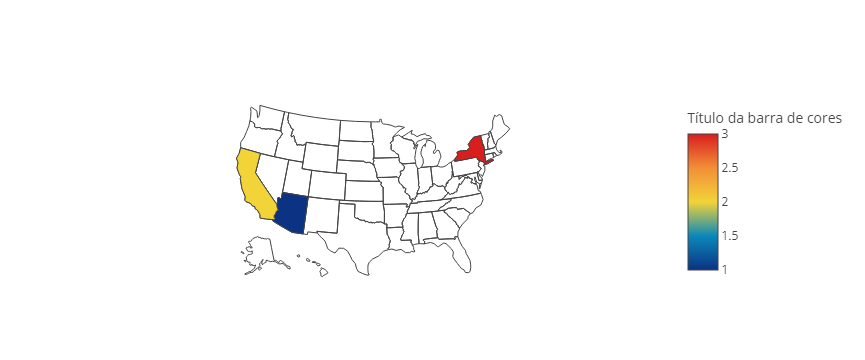

In [15]:
iplot(choromap)

### Dados reais: Mapa dos EUA Choropleth

Agora vamos mostrar um exemplo com alguns dados reais, bem como algumas outras opções que podemos adicionar aos dicionários em dados e layout.

In [16]:
df = pd.read_csv('2011_US_AGRI_Exports')
df.head()

,code,state,category,total exports,beef,pork,poultry,dairy,fruits fresh,fruits proc,total fruits,veggies fresh,veggies proc,total veggies,corn,wheat,cotton,text
0,AL,Alabama,state,1390.63,34.4,10.6,481.0,4.06,8.0,17.1,25.11,5.5,8.9,14.33,34.9,70.0,317.61,Alabama<br>Beef 34.4 Dairy 4.06<br>Fruits 25.1...
1,AK,Alaska,state,13.31,0.2,0.1,0.0,0.19,0.0,0.0,0.00,0.6,1.0,1.56,0.0,0.0,0.00,Alaska<br>Beef 0.2 Dairy 0.19<br>Fruits 0.0 Ve...
2,AZ,Arizona,state,1463.17,71.3,17.9,0.0,105.48,19.3,41.0,60.27,147.5,239.4,386.91,7.3,48.7,423.95,Arizona<br>Beef 71.3 Dairy 105.48<br>Fruits 60...
3,AR,Arkansas,state,3586.02,53.2,29.4,562.9,3.53,2.2,4.7,6.88,4.4,7.1,11.45,69.5,114.5,665.44,Arkansas<br>Beef 53.2 Dairy 3.53<br>Fruits 6.8...
4,CA,California,state,16472.88,228.7,11.1,225.4,929.95,2791.8,5944.6,8736.40,803.2,1303.5,2106.79,34.6,249.3,1064.95,California<br>Beef 228.7 Dairy 929.95<br>Frui...


Agora criamos um dicionário de dados com alguns argumentos adicionais e argumentos de barras de cores:

In [22]:
data = dict(type='choropleth',
            colorscale = 'YIOrRd',
            locations = df['code'],
            z = df['total exports'],
            locationmode = 'USA-states',
            text = df['text'],
            marker = dict(line = dict(color = 'rgb(255,255,255)',width = 2)),
            colorbar = {'title':"Milhões de dólares"}
            ) 

E nosso dicionário de layout com mais alguns argumentos:

In [23]:
layout = dict(title = '2011 Exportações de Agricultura dos EUA por Estado',
              geo = dict(scope='usa',
                         showlakes = True,
                         lakecolor = 'rgb(85,173,240)')
             )

In [24]:
choromap = go.Figure(data = [data],layout = layout)

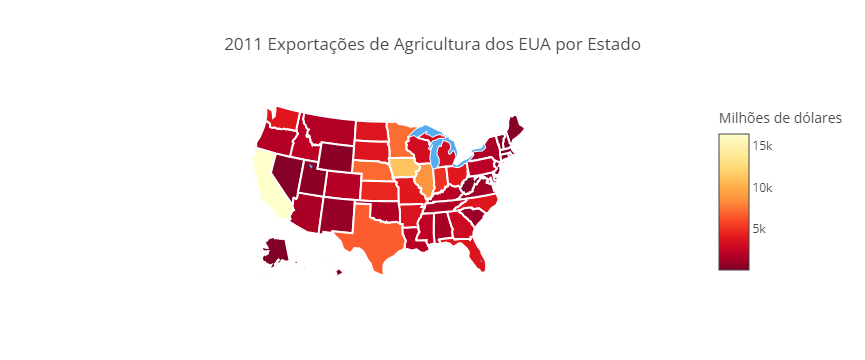

In [25]:
iplot(choromap)

# Mapa-mundi Choropleth

Agora vamos ver um exemplo com um Mapa Mundial:

In [26]:
df = pd.read_csv('2014_World_GDP')
df.head()

,COUNTRY,GDP (BILLIONS),CODE
0,Afghanistan,21.71,AFG
1,Albania,13.40,ALB
2,Algeria,227.80,DZA
3,American Samoa,0.75,ASM
4,Andorra,4.80,AND


In [27]:
data = dict(
        type = 'choropleth',
        locations = df['CODE'],
        z = df['GDP (BILLIONS)'],
        text = df['COUNTRY'],
        colorbar = {'title' : 'GDP Billions US'},
      ) 

In [28]:
layout = dict(
    title = '2014 Global GDP',
    geo = dict(
        showframe = False,
        projection = {'type':'Mercator'}
    )
)

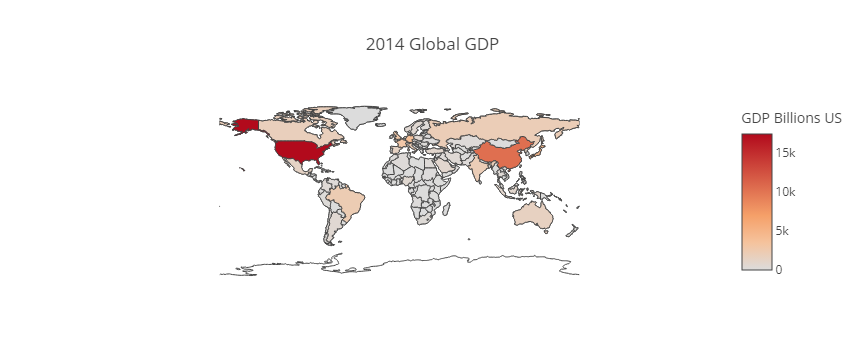

In [29]:
choromap = go.Figure(data = [data],layout = layout)
iplot(choromap)